In [66]:
import pickle
import tensorflow as tf
import keras
from keras import layers
from keras.utils import to_categorical
from keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load train and validation images
dataroot = "dataroot/"
train_data = pickle.load(open(dataroot+"train.p", "rb" ))
val_data = pickle.load(open(dataroot+"valid.p", "rb"))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

In [53]:
my_input_shape = X_train.shape[1:]
my_input_shape

(32, 32, 3)

In [8]:
# One-hot encode
num_classes = 43
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [70]:
def make_graphs(hist, title):
    epochs = len(hist.history['loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 16))
    fig.suptitle(title, fontsize=16)
    make_graph_loss(hist, epochs, axes[0])
    make_graph_f1_score(hist, epochs, axes[1])
    #make_graph_precision(hist, epochs, axes[2])
    #make_graph_recall(hist, epochs, axes[2])
    plt.tight_layout()

def make_graph_loss(hist, epochs, ax):
    eps = [i for i in range(epochs)]
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    sns.lineplot(x=eps, y=train_loss, color='b', label='Training Loss', ax=ax)
    sns.lineplot(x=eps, y=val_loss, color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Training vs Validation Loss')
    ax.legend()

def make_graph_precision(hist, epochs, ax):
    eps = [i for i in range(epochs)]
    train_precision = hist.history['precision_4']  # Replace with your precision metric key
    val_precision = hist.history['val_precision_4']  # Replace with your validation precision metric key
    sns.lineplot(x=eps, y=train_precision, color='b', label='Training Precision', ax=ax)
    sns.lineplot(x=eps, y=val_precision, color='r', label='Validation Precision', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Precision')
    ax.set_title('Training vs Validation Precision')
    ax.legend()

def make_graph_recall(hist, epochs, ax):
    eps = [i for i in range(epochs)]
    train_recall = hist.history['recall']
    val_recall = hist.history['val_recall']
    sns.lineplot(x=eps, y=train_recall, color='b', label='Training Recall', ax=ax)
    sns.lineplot(x=eps, y=val_recall, color='r', label='Validation Recall', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Recall')
    ax.set_title('Training vs Validation Recall')
    ax.legend()

def make_graph_f1_score(hist, epochs, ax):
    eps = [i for i in range(epochs)]
    train_precision = hist.history['precision']
    train_recall = hist.history['recall']
    val_precision = hist.history['val_precision']
    val_recall = hist.history['val_recall']
    
    train_f1 = [2 * ((p * r) / (p + r + tf.keras.backend.epsilon())) for p, r in zip(train_precision, train_recall)]
    val_f1 = [2 * ((p * r) / (p + r + tf.keras.backend.epsilon())) for p, r in zip(val_precision, val_recall)]
    
    sns.lineplot(x=eps, y=train_f1, color='b', label='Training F1 Score', ax=ax)
    sns.lineplot(x=eps, y=val_f1, color='r', label='Validation F1 Score', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('F1 Score')
    ax.set_title('Training vs Validation F1 Score')
    ax.legend()

In [ ]:
# https://keras.io/api/applications/

In [28]:
VGG16_base = VGG16(weights='imagenet', include_top=False, input_shape=my_input_shape)
VGG16_base.trainable = False

x = VGG16_base.output
x = layers.Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)

VGG16_Model = Model(inputs=VGG16_base.input, outputs=predictions)
VGG16_Model.compile(loss="categorical_crossentropy",
                    optimizer="rmsprop",
                    metrics=[Precision(name='precision'), Recall(name='recall')])

In [29]:
VGG16_hist = VGG16_Model.fit(X_train, y_train,
                       batch_size=32,
                       epochs=10,
                       validation_data=(X_val, y_val),
                       verbose=1)

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 8.2577 - precision_4: 0.3671 - recall_2: 0.3142 - val_loss: 5.5994 - val_precision_4: 0.4810 - val_recall_2: 0.4227
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7903 - precision_4: 0.7049 - recall_2: 0.6298 - val_loss: 6.1873 - val_precision_4: 0.4975 - val_recall_2: 0.4503
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.3590 - precision_4: 0.7656 - recall_2: 0.6962 - val_loss: 6.3879 - val_precision_4: 0.5200 - val_recall_2: 0.4637
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.1795 - precision_4: 0.7897 - recall_2: 0.7256 - val_loss: 6.7661 - val_precision_4: 0.4861 - val_recall_2: 0.4449
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.0955 - precision_4: 0.8059 - recall_2: 0.7511 - val_loss: 7.0908 - val_precision_4: 0.4968 - val_recall_2: 0.4519
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.0407 - precision_4: 0.8115 - recall_2: 0.7641 

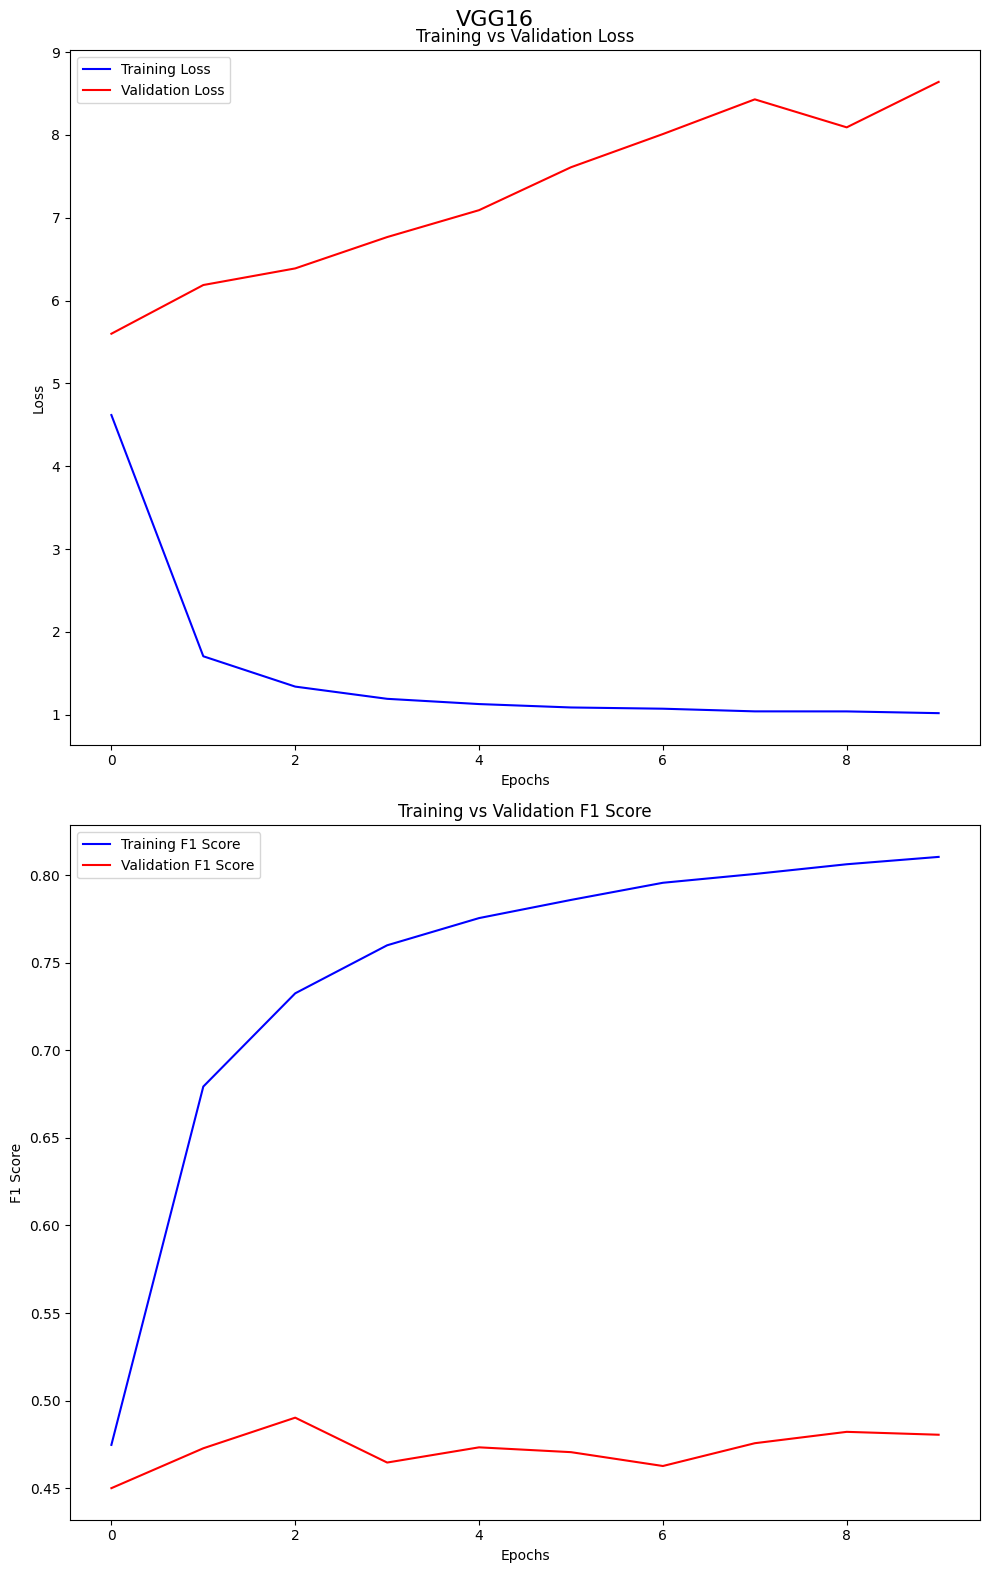

In [42]:
make_graphs(VGG16_hist, "VGG16")

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 2.1940 - precision: 0.5544 - recall: 0.3811 - val_loss: 3.3610 - val_precision: 0.4543 - val_recall: 0.3685
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.8051 - precision: 0.8023 - recall: 0.7062 - val_loss: 3.5388 - val_precision: 0.4659 - val_recall: 0.4063
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.5956 - precision: 0.8492 - recall: 0.7818 - val_loss: 3.7357 - val_precision: 0.4733 - val_recall: 0.4179
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4958 - precision: 0.8750 - recall: 0.8242 - val_loss: 4.0680 - val_precision: 0.4618 - val_recall: 0.4138
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4286 - precision: 0.8862 - recall: 0.8478 - val_loss: 4.1718 - val_precision: 0.4751 - val_recall: 0.4297
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.3823 - precision: 0.9036 - recall: 0.8673 - val_loss: 4.1313 - val_precision: 0.4836

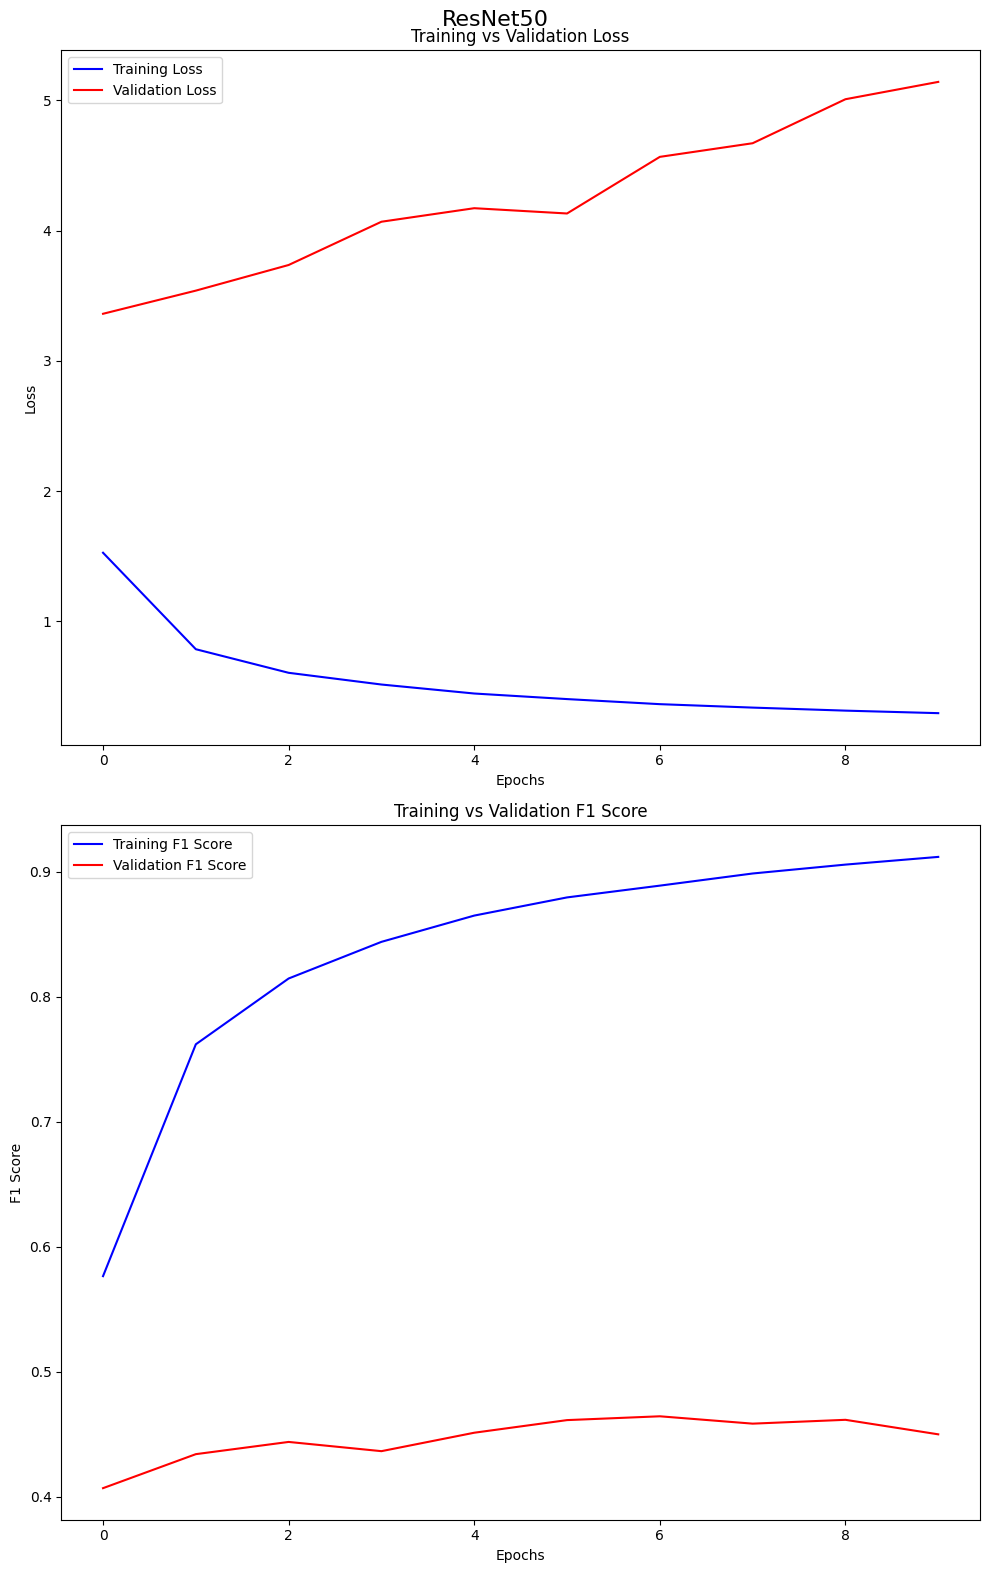

In [71]:
ResNet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=my_input_shape)
ResNet50_base.trainable = False

x = ResNet50_base.output
x = layers.Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)

ResNet50_Model = Model(inputs=ResNet50_base.input, outputs=predictions)
ResNet50_Model.compile(loss="categorical_crossentropy",
                    optimizer="rmsprop",
                    metrics=[Precision(name='precision'), Recall(name='recall')])

ResNet50_hist = ResNet50_Model.fit(X_train, y_train,
                       batch_size=32,
                       epochs=10,
                       validation_data=(X_val, y_val),
                       verbose=1)

make_graphs(ResNet50_hist, "ResNet50")
